## Нарисовать маски изображений 
Этот ноутбук генерирует папку с файлами изображений, на которых изобрежены маски кораблей. Это шаг необходим для последующей передачи изображений для тюнинга масок под прямоугольники. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def rle_decode(mask_rle, shape=(768, 768)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T  # Needed to align to RLE direction

def masks_as_image(in_mask_list):
    # Take the individual ship masks and create a single mask array for all ships
    all_masks = np.zeros((768, 768), dtype = np.int16)
    #if isinstance(in_mask_list, list):
    for mask in in_mask_list:
        if isinstance(mask, str):
            all_masks += rle_decode(mask)
    return np.expand_dims(all_masks, -1)

In [29]:
## непустые маски изображений 

test_images = pd.read_csv('F:\\Downloads\\all\\Submissions\\ResNet_port_v3(5).csv')

test = pd.DataFrame(columns=['ImageId', 'EncodedPixels'])

for c_img in test_images.ImageId:
    if isinstance(test_images[test_images.ImageId == c_img].values[0][1], str):
        test = pd.concat([test, test_images[test_images.ImageId == c_img]])

In [30]:
test.shape

(3635, 2)

In [31]:
print(test.ImageId.unique().shape)
for c_img in test.ImageId.unique():
    img = test[test.ImageId == c_img].EncodedPixels
    img_data = masks_as_image(img)
    img_data = img_data[:,:,0].astype('uint8')*255
    #img_data = img_data.astype('uint8')
    img = Image.fromarray(img_data)
    img.save('F:\\Downloads\\all\\final_sub_masks\\simple_list_resnet_e100\\{}'.format(c_img))

(1260,)


In [33]:
test.head()

,ImageId,EncodedPixels
4,0010551d9.jpg,185340 8 186106 15 186872 22 187639 26 188406 ...
5,001839c6f.jpg,451925 7 452691 10 453458 12 454225 13 454992 ...
6,001839c6f.jpg,458815 1 459582 3 460349 5 461116 6 461884 6 4...
5,001839c6f.jpg,451925 7 452691 10 453458 12 454225 13 454992 ...
6,001839c6f.jpg,458815 1 459582 3 460349 5 461116 6 461884 6 4...


In [35]:
def multi_rle_encode(img):
    labels = label(img[:, :, 0])
    return [rle_encode(labels==k) for k in np.unique(labels[labels>0])]

def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

Text(0.5, 1.0, 'Image$_1$')

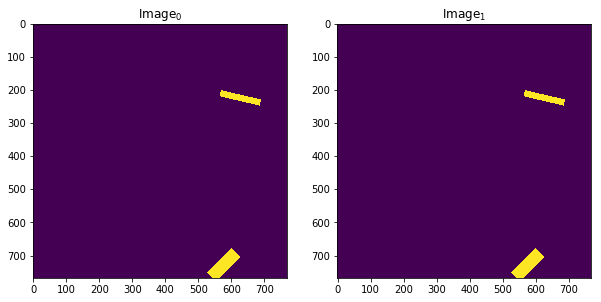

In [47]:
from skimage.morphology import label

sub_final = pd.read_csv('F:\\Downloads\\all\\Submissions\\final\\sub_test_02.csv')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
rle_0 = sub_final.query('ImageId=="54d955de6.jpg"')['EncodedPixels']
img_0 = masks_as_image(rle_0)
ax1.imshow(img_0[:, :, 0])
ax1.set_title('Image$_0$')
rle_1 = multi_rle_encode(img_0)
img_1 = masks_as_image(rle_1)
ax2.imshow(img_1[:, :, 0])
ax2.set_title('Image$_1$')

In [54]:
np.sum(img_0[0:,:1,:0])

0

In [55]:
911/1600


0.569375